## extra feature - 1) best N value 2) Keras Wrapper

In [1]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import csv
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

from keras.layers import Conv1D, Conv2D, MaxPooling2D 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np
from keras.layers import Bidirectional



Using TensorFlow backend.


In [2]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [3]:
import numpy as np

def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

## Read Stock_Price.csv file

In [5]:
df_LSTM = pd.read_csv("CSC215_Project4_Stock_Price.csv")

In [6]:
df_LSTM.shape

(4392, 7)

In [8]:
df_LSTM_new =df_LSTM

In [9]:
df_LSTM_new=df_LSTM_new.drop(['Date', 'Adj_Close'], axis=1)
df_LSTM_new.head()

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [10]:
df_LSTM_new.shape

(4392, 5)

In [11]:
df_close_lstm = df_LSTM_new['Close']

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
df_LSTM_new = scaler.fit_transform(df_LSTM_new)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
#x 70-30
percent70 = int(len(df_LSTM_new)* 0.70)
percent30 = len(df_LSTM_new) - percent70
print(percent70)
print(percent30)

3074
1318


In [14]:
train = df_LSTM_new[0:percent70]
test = df_LSTM_new[percent70:len(df_LSTM_new)]

print(train.shape)
print(test.shape)



(3074, 5)
(1318, 5)


In [15]:
train_close = df_close_lstm[0:percent70].values
test_close =  df_close_lstm[percent70:len(df_close_lstm)].values
print(train_close.shape)
print(test_close.shape)

(3074,)
(1318,)


In [63]:
SEQUENCE_SIZE = 5

#print(x_train[0:2])
#print("Shape of x_train: {}".format(x_train.shape))
x_train,y_train = to_sequences(SEQUENCE_SIZE,train,train_close)
x_test,y_test = to_sequences(SEQUENCE_SIZE,test,test_close)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3068, 5, 1, 5)
Shape of x_test: (1312, 5, 1, 5)
Shape of y_train: (3068,)
Shape of y_test: (1312,)


In [64]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[3]))

In [65]:
x_train.shape

(3068, 5, 5)

In [66]:
y_train.shape

(3068,)

In [67]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

In [68]:
for i in range(5):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(5, 5),activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1312 samples
Epoch 1/10
 - 4s - loss: 198.2217 - val_loss: 3401.5812

Epoch 00001: val_loss improved from inf to 3401.58123, saving model to ./best_weights_lstm.hdf5
Epoch 2/10
 - 1s - loss: 17.9698 - val_loss: 2490.8561

Epoch 00002: val_loss improved from 3401.58123 to 2490.85609, saving model to ./best_weights_lstm.hdf5
Epoch 3/10
 - 1s - loss: 11.2833 - val_loss: 2184.5674

Epoch 00003: val_loss improved from 2490.85609 to 2184.56738, saving model to ./best_weights_lstm.hdf5
Epoch 4/10
 - 1s - loss: 7.4186 - val_loss: 767.3777

Epoch 00004: val_loss improved from 2184.56738 to 767.37766, saving model to ./best_weights_lstm.hdf5
Epoch 5/10
 - 1s - loss: 5.3617 - val_loss: 554.2040

Epoch 00005: val_loss improved from 767.37766 to 554.20402, saving model to ./best_weights_lstm.hdf5
Epoch 6/10
 - 1s - loss: 4.3099 - val_loss: 236.9948

Epoch 00006: val_loss improved from 554.20402 to 236.99481, saving model to ./best_weights

In [69]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 4.016958408779251


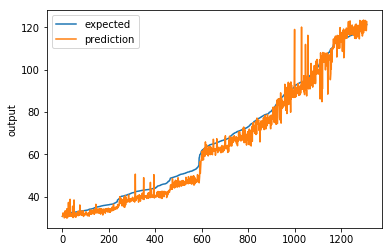

In [70]:
chart_regression(pred.flatten(),y_test,sort=True)

In [71]:
score_r2 = r2_score(pred,y_test)
print(format(score_r2))

0.9802344976934115


### Keras layer wrappers to create an even more complicated layer feature 3

In [72]:
checkpointer_lstm_n = ModelCheckpoint(filepath="./best_weights_lstm_n.hdf5", verbose=1, save_best_only=True)

In [78]:
for i in range(5):
    print(i)
    
    print('Build model...')
    model_lstm_n = Sequential()

    model_lstm_n.add(Bidirectional(LSTM(20, return_sequences=True),input_shape=(5,5)))
    model_lstm_n.add(Bidirectional(LSTM(10)))
    model_lstm_n.add(Dense(32, activation="relu"))
    model_lstm_n.add(Dense(1))
    model_lstm_n.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm_n.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm_n.load_weights('./best_weights_lstm_n.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1312 samples
Epoch 1/10
 - 7s - loss: 238.6084 - val_loss: 3453.1013

Epoch 00001: val_loss did not improve from 16.13596
Epoch 2/10
 - 1s - loss: 55.2726 - val_loss: 2294.6122

Epoch 00002: val_loss did not improve from 16.13596
Epoch 3/10
 - 1s - loss: 7.8354 - val_loss: 1706.3890

Epoch 00003: val_loss did not improve from 16.13596
Epoch 4/10
 - 1s - loss: 1.7197 - val_loss: 1487.4828

Epoch 00004: val_loss did not improve from 16.13596
Epoch 5/10
 - 1s - loss: 0.7564 - val_loss: 1388.7534

Epoch 00005: val_loss did not improve from 16.13596
Epoch 6/10
 - 1s - loss: 0.5107 - val_loss: 1335.1389

Epoch 00006: val_loss did not improve from 16.13596
Epoch 7/10
 - 1s - loss: 0.3964 - val_loss: 1303.8836

Epoch 00007: val_loss did not improve from 16.13596
Epoch 8/10
 - 1s - loss: 0.3704 - val_loss: 1283.6497

Epoch 00008: val_loss did not improve from 16.13596
Epoch 9/10
 - 1s - loss: 0.3514 - val_loss: 1273.7339

Epoch 00009:

OSError: Unable to open file (Unable to open file: name = './best_weights_lstm_n.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [79]:
pred_m = model_lstm.predict(x_test)
score_m = np.sqrt(metrics.mean_squared_error(pred_m,y_test))
print("Score (RMSE): {}".format(score_m))

Score (RMSE): 4.016958408779251


In [80]:
score_r2_m = r2_score(pred_m,y_test)
print(format(score_r2_m))

0.9802344976934115
